### Classification in Business

<center>
    <img src = 'images/uci_biz.png' />
</center>



------------


For this try-it, you are to explore some available datasets related to business applications of classification.  Using a dataset from the UCI Machine Learning Repository, scan datasets   under the subject area "BUSINESS" [link here](https://archive.ics.uci.edu/ml/datasets.php?format=&task=cla&att=&area=bus&numAtt=&numIns=&type=&sort=nameUp&view=table).  Find a dataset that looks interesting to you and decide how you could use Logistic Regression to help make a business decision using the data. 

In sharing your results, be sure to clearly describe the following:

- the dataset and its features
- the classification problem -- what are you classifying here?
- a business decision that can be supported using the results of the classification model

Share your summary on the appropriate discussion board for the activity. 

In [25]:
#import librariesimport pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_curve

# For reproducibility
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)


In [5]:
# load and explore dtaset

In [6]:
# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, names=column_names, na_values=' ?', sep=',\s', engine='python')

# Drop rows with missing values
data.dropna(inplace=True)

# Display basic information about the dataset
print(data.info())
print(data.describe())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  3

In [7]:
#Step 3: Data Preparation

In [9]:
#Encoding Categorical Variables:
#Use one-hot encoding for categorical variables.

In [11]:
# Features and target variable
X = data.drop('income', axis=1)
y = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Define the column transformer
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Create the preprocessing and logistic regression pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000))
])
print(pipeline)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('classifier', LogisticRegressio

In [12]:
#Train-Test Split:

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
#Step 4: Train the Model


In [15]:
# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [16]:
# Evaluate the Model

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      4942
        >50K       0.75      0.61      0.68      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.78      0.79      6513
weighted avg       0.85      0.86      0.85      6513

[[4625  317]
 [ 605  966]]
ROC AUC score: 0.9085465235046077


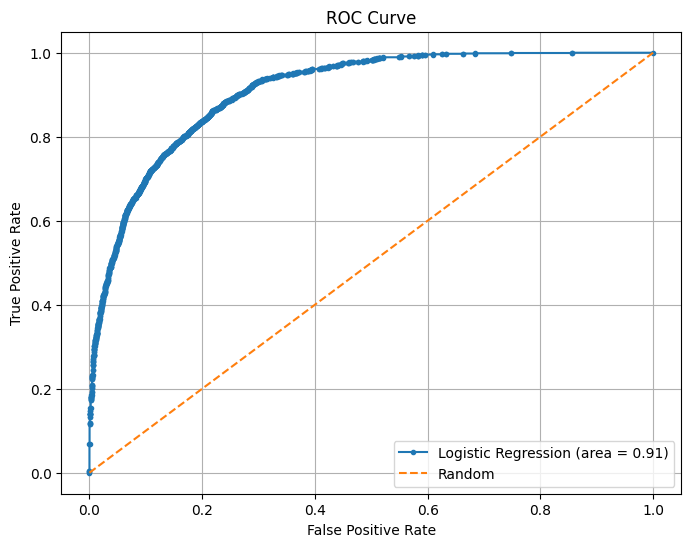

In [17]:
# Predict on the test set
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Classification report
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC score: {roc_auc}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='Logistic Regression (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


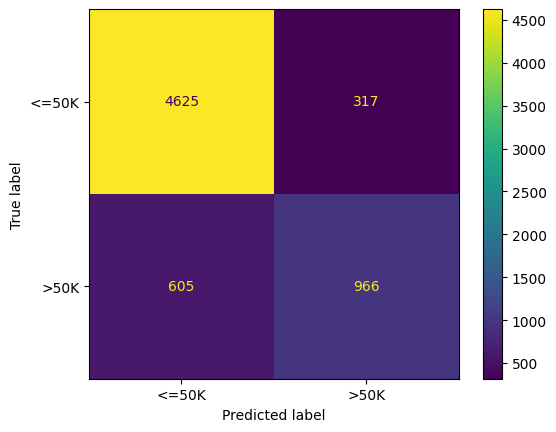

<Figure size 640x480 with 0 Axes>

In [21]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['<=50K', '>50K' ])
disp.plot()
plt.show()
plt.savefig('data/cf_income.png')

In [28]:
# Define the parameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}


In [30]:
# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Best score
best_score = grid_search.best_score_
print(f"Best F1-score: {best_score}")

Best parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best F1-score: nan


In [31]:
# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Compute Precision-Recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Find the optimal threshold to minimize false negatives
optimal_idx = np.argmax(2 * precision * recall / (precision + recall))
optimal_threshold = thresholds[optimal_idx]

# Predict with the optimal threshold
y_pred_opt

NameError: name 'y_pred_opt' is not defined

/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "/opt/conda/lib/python3.8/site-packages/sklearn/utils/_response.py", line 194, in _get_response_values
    y_pred = prediction_meth

In [23]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# For reproducibility
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, names=column_names, na_values=' ?', sep=',\s', engine='python')

# Drop rows with missing values
data.dropna(inplace=True)

# Display basic information about the dataset
print(data.info())
print(data.describe())
print(data.head())

# Features and target variable
X = data.drop('income', axis=1)
y = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Define the column transformer
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Create the preprocessing and logistic regression pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced'))
])

# Train-Test Split and SMOTE for Handling Imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define the parameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_res, y_train_res)

# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Best score
best_score = grid_search.best_score_
print(f"Best F1-score: {best_score}")




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  3

ValueError: could not convert string to float: 'Local-gov'